In [24]:
import sys

sys.path.append("../../../src/stong_core")

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import make_sto_ng
import pandas as pd

importlib.reload(make_sto_ng)
from make_sto_ng import *

In [27]:
c_a = 1
c_b = 2
M = 4  # number of basis functions
exps = [c_a * c_b ** (i - M + 1) for i in range(M)]
a = BasisFunction(1, 1, exps, [[1 / M for _ in range(M)]])
result_1 = optimize_sto_ng(a)
exps_1, coefs_1 = params2expscoefs(1, 1, result_1.x)
df = pd.DataFrame({"exps_1": exps_1, "coefs_1s": coefs_1[0]})

exps = [c_a * c_b ** (i - M + 1) for i in range(M)]
a = BasisFunction(2, 2, exps, [[1 / M for _ in range(M)] for _ in range(2)])
result_2 = optimize_sto_ng(a)
exps_2, coefs_2 = params2expscoefs(2, 2, result_2.x)
df["exps_2"] = exps_2
df["coefs_2s"] = coefs_2[0]
df["coefs_2p"] = coefs_2[1]

exps = [c_a * c_b ** (i - M + 1) for i in range(M)]
a = BasisFunction(3, 3, exps, [[1 / M for _ in range(M)] for _ in range(3)])
result_3 = optimize_sto_ng(a)
exps_3, coefs_3 = params2expscoefs(3, 3, result_3.x)
df["exps_3"] = exps_3
df["coefs_3s"] = coefs_3[0]
df["coefs_3p"] = coefs_3[1]
df["coefs_3d"] = coefs_3[2]

exps = [c_a * c_b ** (i - M + 1) for i in range(M)]
a = BasisFunction(4, 3, exps, [[1 / M for _ in range(M)] for _ in range(3)])
result_4 = optimize_sto_ng(a)
exps_4, coefs_4 = params2expscoefs(4, 3, result_4.x)
print(exps_4)
df["exps_4"] = exps_4
df["coefs_4s"] = coefs_4[0]
df["coefs_4p"] = coefs_4[1]
df["coefs_4d"] = coefs_4[2]


df.to_csv("sto_4g.csv", index=False)

[0.03497742 0.07129075 0.15964623 0.44718942]


In [ ]:
df["exps_2"]

0    0.074772
1    0.229171
2    0.978367
Name: exps_2, dtype: float64

In [ ]:
r = np.linspace(0.0, 5, 100)
phi_1s_base = BasisFunction(1, 1, df["exps_1"].to_list(), [df["coefs_1s"].to_list()])
phi_2s_base = BasisFunction(1, 1, df["exps_2"].to_list(), [df["coefs_2s"].to_list()])
phi_2p_base = BasisFunction(
    2,
    2,
    df["exps_2"].to_list(),
    [0, df["coefs_2p"].to_list()],
)
phi_3s_base = BasisFunction(1, 1, df["exps_3"].to_list(), [df["coefs_3s"].to_list()])
phi_3p_base = BasisFunction(
    2,
    2,
    df["exps_3"].to_list(),
    [0, df["coefs_3p"].to_list()],
)
phi_3d_base = BasisFunction(
    3,
    3,
    df["exps_3"].to_list(),
    [0, 0, df["coefs_3d"].to_list()],
)
phi_4s_base = BasisFunction(1, 1, df["exps_4"].to_list(), [df["coefs_4s"].to_list()])
phi_4p_base = BasisFunction(
    2,
    2,
    df["exps_4"].to_list(),
    [0, df["coefs_4p"].to_list()],
)
phi_4d_base = BasisFunction(
    3,
    3,
    df["exps_4"].to_list(),
    [0, 0, df["coefs_4d"].to_list()],
)

In [ ]:
print(phi_2p_base.exps)
print(phi_2p_base.coefs)

[0.0747716135151309, 0.22917082317384896, 0.9783670552458854]
[0, [0.3881238402965797, 0.6086090954416196, 0.15864707745383594]]


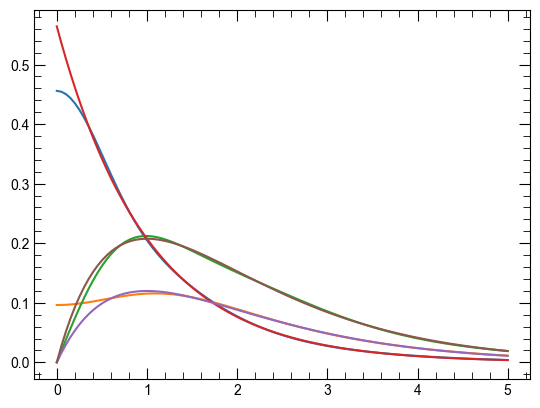

In [ ]:
fig, ax = plt.subplots()
ax.plot(r, sto_ng(phi_1s_base, r, 1))
ax.plot(r, sto_ng(phi_2s_base, r, 1))
ax.plot(r, sto_ng(phi_2p_base, r, 2))
ax.plot(r, chi_n(1, r, "s"))
ax.plot(r, chi_n(2, r, "s"))
ax.plot(r, chi_n(2, r, "p"))
plt.show()

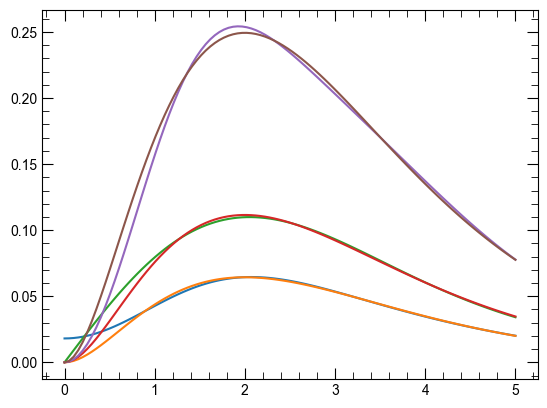

In [ ]:
fig, ax = plt.subplots()
ax.plot(r, sto_ng(phi_3s_base, r, 1))
ax.plot(r, chi_n(3, r, "s"))
ax.plot(r, sto_ng(phi_3p_base, r, 2))
ax.plot(r, chi_n(3, r, "p"))
ax.plot(r, sto_ng(phi_3d_base, r, 3))
ax.plot(r, chi_n(3, r, "d"))
plt.show()

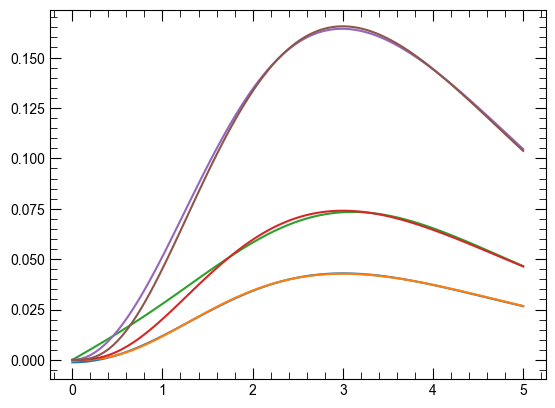

In [ ]:
fig, ax = plt.subplots()
ax.plot(r, sto_ng(phi_4s_base, r, 1))
ax.plot(r, chi_n(4, r, "s"))
ax.plot(r, sto_ng(phi_4p_base, r, 2))
ax.plot(r, chi_n(4, r, "p"))
ax.plot(r, sto_ng(phi_4d_base, r, 3))
ax.plot(r, chi_n(4, r, "d"))